# Cardio Vascular disease prediction

In [ ]:
"""Analysis and Prediction 

Abstract
cardiovascular diseases are the first leading cause of death across the world as well. World Health Organization has estimated 
that the mortality rate caused by heart diseases will mount to 23 million cases by 2030. Hence, the use of data mining 
algorithms could be useful in predicting coronary artery diseases. 

Objective
The objective of this research is to build classifiers to predict whether a person has cardiovascular disease based on 
their medical test, age, and gender also also to identify which test is more reliable in determining cardiovascular disease.

Knowledge of the risk factors associated with heart disease helps health care professionals
to identify patients at high risk of having heart disease . Statistical analysis has identified
the risk factors associated with heart disease to be age, blood pressure, smoking habit, total
cholesterol, diabetes, hypertension, family history of heart disease, obesity, and lack of
physical activity.

# note:-Here family History, Other habits like Smoking,Alcohal etc are not inclused.


Method
Collected patient data from four national hospital. Two from hospital in USA and two from Europe. 
"""

In [1]:
# import the basic library
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("Cardio_vascular.csv")

In [3]:
df=data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### The dataset used in this article is the Cleveland Heart Disease dataset. There are 14 columns in the dataset, 
which are described below.
1. Age, in years
2. Sex, 1 = male; 0 = female
3. cp: chest pain type
– Value 0: typical angina
– Value 1: atypical angina
– Value 2: non-anginal pain
– Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dAttribute Information:
6. fbs: (fasting blood sugar > 120 mg/dl) 1 = true; 0 =false
7. restecg: resting electrocardiographic results
– Value 0: normal
– Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
– Value 2: showing probable or definite left ventricu lar hypertrophy by Estes’ criteria
8. thalach: maximum heart rate achieved during stress TEST
9. exang: exercise induced angina, 1 = yes; 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
– Value 0: upsloping
– Value 1: flat
– Value 2: downsloping
12. ca: number of major vessels (0-4) colored by flourosopy
13. thal: thalassmia, 0 = null; 1=normal; 2 = fixed defect; 3 = reversible defect
14. condition (target) : 0 = no disease, 1 = disease


In [4]:
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.436098,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.141463,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.071551,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,22.990115,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.nunique()

age                    41
gender                  2
rest_cp                 4
rest_bp                49
cholesterol           152
fast_bloodsugar         2
rest_ecg                3
stress_HR              91
Exercise_cp             2
STdepression_Exerc     40
STpeak_exerc            3
coloured_vessels        5
thalassmia              4
heart_disease           2
dtype: int64

In [10]:
df.heart_disease.value_counts(normalize=True)

1    0.513171
0    0.486829
Name: heart_disease, dtype: float64

In [9]:
df.heart_disease.value_counts()/len(df)

1    0.513171
0    0.486829
Name: heart_disease, dtype: float64

In [12]:
df.head(2)

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


<Axes: xlabel='heart_disease', ylabel='count'>

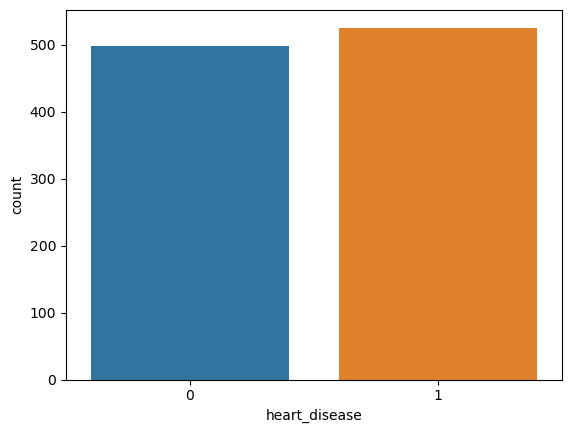

In [11]:
sns.countplot(x="heart_disease", data=df)

In [13]:
df["rest_cp"].value_counts()

0    497
2    284
1    167
3     77
Name: rest_cp, dtype: int64

In [ ]:
"""
‘rest_cp’……..Chest pain type
………… 0 = Typical angina
………… 1 = Atypical angina
………… 2 = Non-anginal pain
………… 3 = Asymptomatic
"""

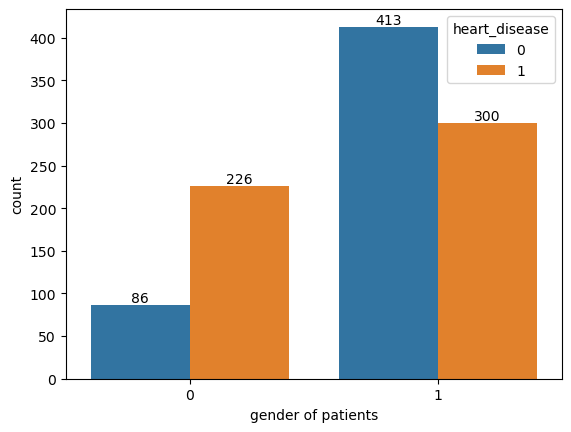

In [14]:
gender_count=sns.countplot(x="gender", data=df,hue="heart_disease")
gender_count.set(xlabel="gender of patients")

for i in gender_count.containers:
    gender_count.bar_label(i)

<Axes: xlabel='rest_cp', ylabel='count'>

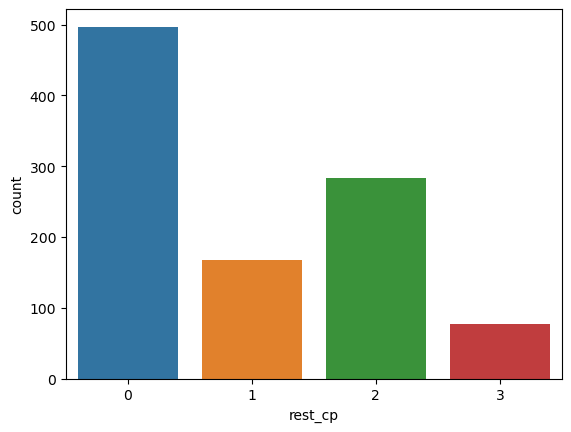

In [15]:
sns.countplot(x="rest_cp", data=df)

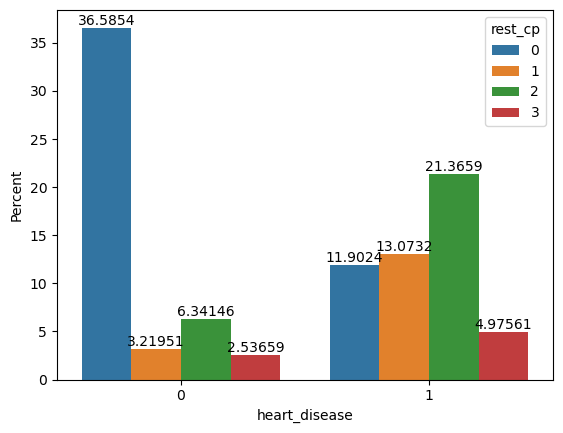

In [20]:
ax = sns.barplot(x="heart_disease", y="rest_cp", data=df,hue="rest_cp", estimator=lambda x: len(x) / len(df) * 100)
#ax = sns.barplot(x="heart_disease", y="rest_cp", data=df,hue="rest_cp")
ax.set(ylabel="Percent")

for i in ax.containers:
    ax.bar_label(i)

In [ ]:
#please complete EDA

In [18]:
df["age"].min()

29

In [19]:
df["age"].max()

77

#### assignemnt please create slab of age group 25,40,55,80

#### please complete the EDA and write interpretation

In [21]:
df.head(2)

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [24]:
df.skew()# range +/-3

age                  -0.249478
gender               -0.851449
rest_cp               0.529455
rest_bp               0.739768
cholesterol           1.074073
fast_bloodsugar       1.971339
rest_ecg              0.180440
stress_HR            -0.516791
Exercise_cp           0.692655
STdepression_Exerc    1.210899
STpeak_exerc         -0.479134
coloured_vessels      1.261189
thalassmia           -0.524390
heart_disease        -0.052778
dtype: float64

In [25]:
df.kurt()#+/-5 range

age                  -0.524644
gender               -1.277531
rest_cp              -1.149500
rest_bp               0.991221
cholesterol           3.996803
fast_bloodsugar       1.889859
rest_ecg             -1.309614
stress_HR            -0.080328
Exercise_cp          -1.523205
STdepression_Exerc    1.314471
STpeak_exerc         -0.647129
coloured_vessels      0.701123
thalassmia            0.250827
heart_disease        -2.001123
dtype: float64

In [ ]:
# creation of Dependent and independent variable

In [22]:
X=df.drop(["heart_disease"],axis=1)
Y=df["heart_disease"]

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [29]:
scaler=StandardScaler()
X_scaled=scaler.fit(X)
X_scaled

StandardScaler()

In [30]:
X_scaled=scaler.transform(X)

In [31]:
X_scaled

array([[-0.26867367,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15838512,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71652022,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.82011641,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.48925076, -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04809657,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [32]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,-0.268674,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.820689,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158385,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.254953,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716520,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.050593,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.723923,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516062,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834212,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.877438,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [ ]:
# multi collinearity

In [33]:
df_matrix=X_scaled.corr()
df_matrix

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
age,1.000000,-0.103574,-0.071960,0.271001,0.219832,0.121163,-0.132515,-0.390854,0.088017,0.208159,-0.168905,0.271415,0.072191
gender,-0.103574,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.048612,0.139157,0.084687,-0.026666,0.111729,0.198424
rest_cp,-0.071960,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.305959,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
rest_bp,0.271001,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.038721,0.061197,0.187434,-0.120445,0.104554,0.059276
cholesterol,0.219832,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.020588,0.067382,0.064880,-0.014248,0.074259,0.100244
fast_bloodsugar,0.121163,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.009370,0.049261,0.010859,-0.061902,0.137156,-0.042177
rest_ecg,-0.132515,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.049503,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
stress_HR,-0.390854,-0.048612,0.305959,-0.038721,-0.020588,-0.009370,0.049503,1.000000,-0.378870,-0.346867,0.394834,-0.205438,-0.096839
Exercise_cp,0.088017,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.378870,1.000000,0.310844,-0.267335,0.107849,0.197201
STdepression_Exerc,0.208159,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.346867,0.310844,1.000000,-0.575189,0.221816,0.202672


<Axes: >

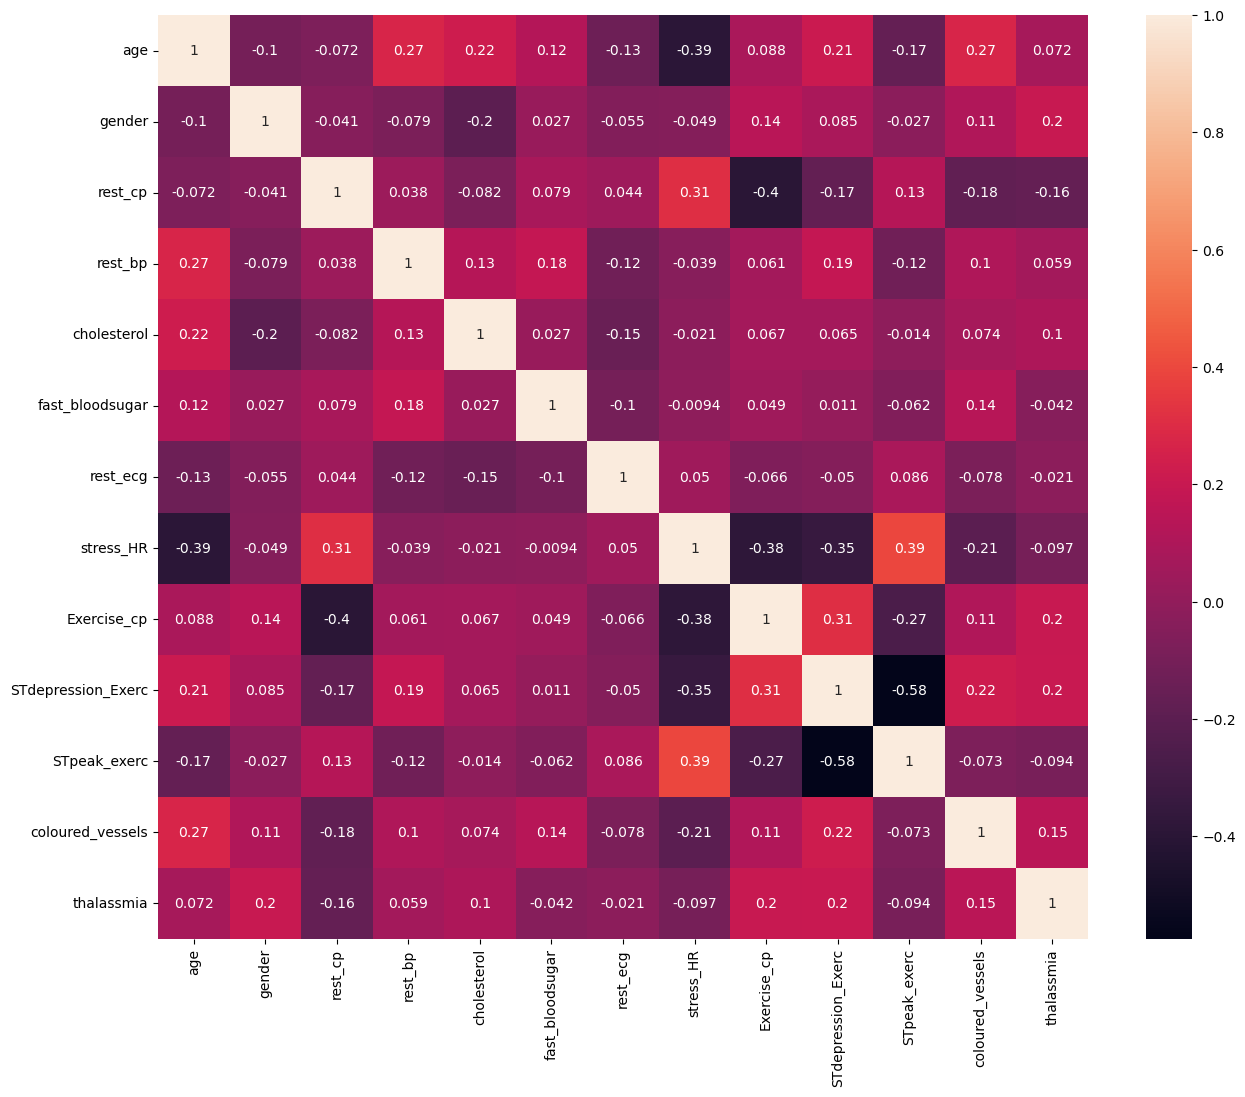

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(df_matrix,annot=True)

In [ ]:
# there is no high multi collinearity

In [36]:
Y.value_counts()

1    526
0    499
Name: heart_disease, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=101,stratify=Y)

In [38]:
X_train.shape

(820, 13)

In [39]:
X_test.shape

(205, 13)

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [42]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [44]:
Y_pred_train=lr.predict(X_train)

In [43]:
Y_pred_test=lr.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
accuracy_score(Y_train,Y_pred_train)

0.8560975609756097

In [47]:
accuracy_score(Y_test,Y_pred_test)

0.8780487804878049

In [48]:
confusion_matrix(Y_test,Y_pred_test)

array([[83, 17],
       [ 8, 97]], dtype=int64)

In [50]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       100
           1       0.85      0.92      0.89       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



# assignment please calcualte the specificity,sensitivity,balanced_accuracy

In [51]:
Y_pred_test

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [52]:
Y_test

581    1
832    1
665    1
409    0
882    0
      ..
734    0
369    1
257    1
131    1
549    1
Name: heart_disease, Length: 205, dtype: int64

In [53]:
X_test.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
581,-1.150982,0.661504,1.027618,0.479107,-0.213313,-0.418878,-1.004049,1.342908,-0.712287,-0.912329,0.995433,-0.731971,-0.522122
832,1.495943,0.661504,1.027618,-0.777449,0.601156,-0.418878,0.891255,0.080880,-0.712287,-0.060888,0.995433,0.238625,1.089852
665,1.165077,-1.511706,1.027618,0.479107,3.316053,2.387330,-1.004049,0.341989,-0.712287,-0.231177,0.995433,0.238625,-0.522122
409,-0.930405,0.661504,1.027618,1.050269,-0.290882,-0.418878,0.891255,-0.093193,-0.712287,2.152857,-0.624121,-0.731971,-0.522122
882,0.282769,0.661504,-0.915755,-0.092055,-2.230094,-0.418878,0.891255,-1.485775,1.403928,0.109400,-0.624121,0.238625,1.089852


In [ ]:
# probability

In [54]:
probability=lr.predict_proba(X_test)
probability

array([[0.05750397, 0.94249603],
       [0.43928627, 0.56071373],
       [0.19887412, 0.80112588],
       [0.55026667, 0.44973333],
       [0.94735715, 0.05264285],
       [0.1700311 , 0.8299689 ],
       [0.94421125, 0.05578875],
       [0.02783247, 0.97216753],
       [0.17749707, 0.82250293],
       [0.99479939, 0.00520061],
       [0.87415307, 0.12584693],
       [0.59335852, 0.40664148],
       [0.01029304, 0.98970696],
       [0.37551681, 0.62448319],
       [0.21508734, 0.78491266],
       [0.06763933, 0.93236067],
       [0.97480356, 0.02519644],
       [0.01403937, 0.98596063],
       [0.98970308, 0.01029692],
       [0.03693971, 0.96306029],
       [0.87415307, 0.12584693],
       [0.91225857, 0.08774143],
       [0.91776918, 0.08223082],
       [0.35268202, 0.64731798],
       [0.22484214, 0.77515786],
       [0.36059798, 0.63940202],
       [0.1700311 , 0.8299689 ],
       [0.68857116, 0.31142884],
       [0.01020545, 0.98979455],
       [0.30124769, 0.69875231],
       [0.

In [57]:
# ROC AUC---
prob_pos_class=lr.predict_proba(X_test)[:,1]
#prob_pos_class

In [59]:
from sklearn.metrics import roc_auc_score

In [61]:
auc_score=roc_auc_score(Y_test,prob_pos_class)
auc_score

0.9420000000000001

In [62]:
auc_score1=roc_auc_score(Y_test,Y_pred_test)
auc_score1

0.876904761904762

In [ ]:
# plotting the ROC curve

In [64]:
from sklearn.metrics import roc_curve

In [66]:
fpr,tpr,thresh=roc_curve(Y_test,prob_pos_class,pos_label=1)

In [67]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.05, 0.06,
       0.06, 0.07, 0.07, 0.07, 0.07, 0.09, 0.09, 0.1 , 0.1 , 0.1 , 0.12,
       0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.15, 0.15, 0.17, 0.18, 0.22,
       0.22, 0.24, 0.26, 0.26, 0.27, 0.27, 0.28, 0.28, 0.3 , 0.34, 0.35,
       0.37, 0.4 , 0.42, 0.43, 0.46, 0.47, 0.5 , 0.53, 0.57, 0.58, 0.58,
       0.62, 0.65, 0.67, 0.69, 0.71, 0.79, 0.81, 0.82, 0.86, 0.87, 0.9 ,
       0.96, 0.98, 1.  ])

In [68]:
tpr

array([0.        , 0.00952381, 0.01904762, 0.03809524, 0.06666667,
       0.1047619 , 0.21904762, 0.23809524, 0.34285714, 0.38095238,
       0.4       , 0.4       , 0.43809524, 0.45714286, 0.45714286,
       0.48571429, 0.5047619 , 0.56190476, 0.58095238, 0.6       ,
       0.6       , 0.6       , 0.68571429, 0.68571429, 0.7047619 ,
       0.71428571, 0.73333333, 0.73333333, 0.75238095, 0.75238095,
       0.79047619, 0.81904762, 0.81904762, 0.82857143, 0.86666667,
       0.87619048, 0.87619048, 0.88571429, 0.9047619 , 0.9047619 ,
       0.92380952, 0.92380952, 0.92380952, 0.92380952, 0.93333333,
       0.93333333, 0.93333333, 0.96190476, 0.96190476, 0.98095238,
       0.98095238, 0.99047619, 0.99047619, 0.99047619, 0.99047619,
       0.99047619, 0.99047619, 0.99047619, 0.99047619, 0.99047619,
       0.99047619, 0.99047619, 0.99047619, 0.99047619, 0.99047619,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [69]:
thresh

array([1.99458797e+00, 9.94587973e-01, 9.94529588e-01, 9.92524635e-01,
       9.89134775e-01, 9.85960632e-01, 9.55050539e-01, 9.55008128e-01,
       9.22790188e-01, 9.13308377e-01, 8.98650596e-01, 8.98349390e-01,
       8.81367450e-01, 8.49721718e-01, 8.49238704e-01, 8.39339006e-01,
       8.29968899e-01, 8.00325558e-01, 7.98282456e-01, 7.83020090e-01,
       7.79362407e-01, 7.75157863e-01, 6.98752308e-01, 6.97961089e-01,
       6.96965876e-01, 6.88619817e-01, 6.76727719e-01, 6.54547358e-01,
       6.46385848e-01, 6.41898400e-01, 6.37775915e-01, 6.27814992e-01,
       6.24483185e-01, 6.02840518e-01, 5.85256775e-01, 5.84219635e-01,
       5.64316490e-01, 5.61400555e-01, 5.60713729e-01, 5.53961351e-01,
       5.36443059e-01, 5.20296754e-01, 4.98819607e-01, 4.96091571e-01,
       4.94636554e-01, 4.12284426e-01, 4.06641483e-01, 3.73223335e-01,
       3.56806189e-01, 3.50627707e-01, 3.41374819e-01, 3.27705593e-01,
       3.06069573e-01, 2.30037482e-01, 2.26707551e-01, 2.19022979e-01,
      

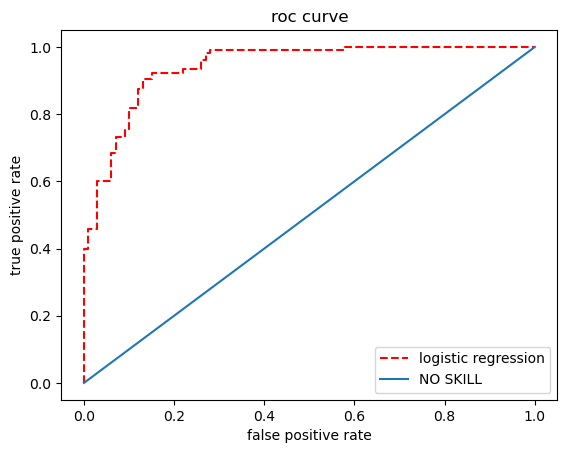

In [75]:
plt.plot(fpr,tpr,linestyle='--',color="red",label="logistic regression")
plt.plot([0,1],label="NO SKILL")# no skill line
plt.title("roc curve")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()